# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [50]:
import pandas as pd

In [51]:
samplns_data = pd.read_json("./05_clean_data.json.zip")
baseline_data = pd.read_json("./00_simple_baseline_data.json.zip")

In [52]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound

,instance_name,best_lower_bound
0,APL,7
1,APL-Model,7
2,BankingSoftware,28
3,BattleofTanks,256
4,ChatClient,7
5,DMIE,16
6,E-Shop,8
7,EMBToolkit,1851
8,FameDB,8
9,FeatureIDE,7


In [26]:
samplns_data = samplns_data[["instance_name", "upper_bound"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
samplns_data["gap"] = 100 * (
    1 - (samplns_data["best_lower_bound"] / samplns_data["upper_bound"])
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data

,instance_name,upper_bound,best_lower_bound,gap,algorithm_name
0,busybox_2020-12-16_21-53-05,23,18,21.739130,SampLNS
1,busybox_2020-12-16_21-53-05,24,18,25.000000,SampLNS
2,busybox_2020-12-16_21-53-05,24,18,25.000000,SampLNS
3,busybox_2020-12-16_21-53-05,23,18,21.739130,SampLNS
4,busybox_2020-12-16_21-53-05,23,18,21.739130,SampLNS
...,...,...,...,...,...
225,integrator_arm7,45,33,26.666667,SampLNS
226,integrator_arm7,46,33,28.260870,SampLNS
227,integrator_arm7,47,33,29.787234,SampLNS
228,integrator_arm7,44,33,25.000000,SampLNS


In [24]:
baseline_data = baseline_data[
    ["instance_name", "sample_size", "baseline_alg", "baseline_alg_conf"]
]
baseline_data = baseline_data.merge(best_lower_bound, on="instance_name")
baseline_data["gap"] = 100 * (
    1 - (baseline_data["best_lower_bound"] / baseline_data["sample_size"])
)


def baseline_alg_name(row):
    settings = row["baseline_alg_conf"]
    if "_m" in settings:
        m = settings.split("_m")[-1].split("_")[0]
        return f"{row['baseline_alg']}(m={m})"
    return row["baseline_alg"]


baseline_data["algorithm_name"] = baseline_data.apply(baseline_alg_name, axis=1)
# baseline_data.rename(columns={"baseline_alg": "Algorithm"})
baseline_data

,instance_name,sample_size,baseline_alg,baseline_alg_conf,best_lower_bound,gap,algorithm_name
0,calculate,9.0,FIDE-ICPL,t2,5,44.444444,FIDE-ICPL
1,calculate,9.0,FIDE-ICPL,t2,5,44.444444,FIDE-ICPL
2,calculate,9.0,FIDE-ICPL,t2,5,44.444444,FIDE-ICPL
3,calculate,9.0,FIDE-ICPL,t2,5,44.444444,FIDE-ICPL
4,calculate,9.0,FIDE-ICPL,t2,5,44.444444,FIDE-ICPL
...,...,...,...,...,...,...,...
2525,ea2468,65.0,YASA,t2_m10_null,31,52.307692,YASA(m=10)
2526,ea2468,65.0,YASA,t2_m10_null,31,52.307692,YASA(m=10)
2527,ea2468,65.0,YASA,t2_m10_null,31,52.307692,YASA(m=10)
2528,ea2468,65.0,YASA,t2_m10_null,31,52.307692,YASA(m=10)


In [41]:
gaps = pd.concat(
    [samplns_data[["algorithm_name", "gap"]], baseline_data[["algorithm_name", "gap"]]]
)
gaps

,algorithm_name,gap
0,SampLNS,21.739130
1,SampLNS,25.000000
2,SampLNS,25.000000
3,SampLNS,21.739130
4,SampLNS,21.739130
...,...,...
2525,YASA(m=10),52.307692
2526,YASA(m=10),52.307692
2527,YASA(m=10),52.307692
2528,YASA(m=10),52.307692


In [53]:
gaps["solved"] = 0.0
gaps.loc[~gaps["gap"].isna(), "solved"] = 1
gaps.groupby(["algorithm_name"]).mean()

,gap,solved
algorithm_name,,
FIDE-Chvatal,41.026569,0.786957
FIDE-ICPL,41.040715,0.978261
FIDE-YASA(m=1),36.615551,1.000000
FIDE-YASA(m=10),30.246306,1.000000
FIDE-YASA(m=3),32.022133,1.000000
FIDE-YASA(m=5),31.264555,1.000000
Incling,48.784221,0.978261
SampLNS,11.592112,1.000000
YASA(m=1),34.958539,1.000000


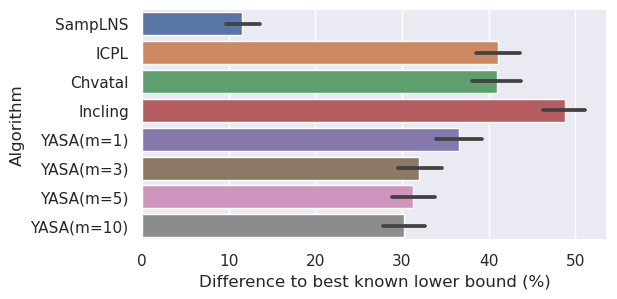

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[~gaps["algorithm_name"].str.startswith("YASA")].copy()
f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
sns.barplot(data=t, y="algorithm_name", x="gap")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm")
plt.show()